# La derivada de una función y su aproximación

**Objetivo general**
- Revisar el concepto de derivada usando herramientas visuales que permitan comprender su sentido geométrico.

**Objetivos particulares**
- Comprender lo que significa el cambio instantáneo.
- Revisar algunas reglas de derivación.
- Realizar ejercicios que fortalezcan los conceptos aprendidos.

## Contenido
- [1 - Introducción.](#1)
- [2 - La curva del olvido](#2)    
    - [2.1 - ¿Cuánto dura el recuerdo?.](#2-1)
    - [Ejercicio 1.](#ej-1)
- [3 - Definición de Derivada.](#3)
    - [Ejercicio 2.](#ej-2)

<a name='1'></a>
## Introducción

Si revisamos con cuidado, algunas definiciones matemáticas utilizan un tipo de figura literaria conocida como <a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>*oxímoron*</a>. En términos simples, un oxímoron consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. 

Por ejemplo: **La razón de cambio instantáneo**. 
- Cuando se habla de un *cambio*, se requiere de la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro; 
- por otro lado, la palabra *instantáneo* tiene que ver con algo que dura un instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de cambio instantáneo tiene que ver con un concepto muy importante en Cálculo: *la derivada*.

In [13]:
# Importamos todas las bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visual 
from evaluacion import Ejercicio
ȩ = Ejercicio('', local=True)

<a name='2'></a>
## La curva del olvido.

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Podemos definir $S \in (0,1]$, donde $1$ es la máxima intensidad de recuerdo y un valor cercano a $0$ corresponde a algo que no nos interesa nada.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

La siguiente gráfica muestra cómo decrecen nuestros recuerdos con el paso del tiempo.

In [3]:
# Definimos la funcion del olvido
def R(t, S=0.9):
    return np.exp(-t/S)

A continuación se muestra la gráfica para la función del olvido para varios valores de $S$.

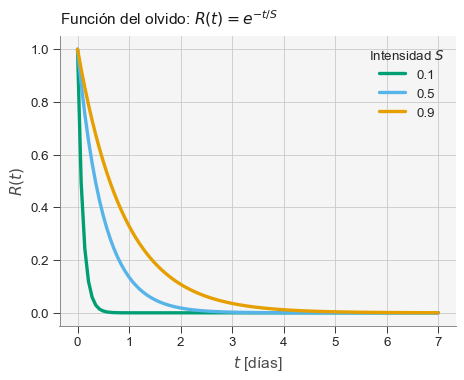

In [4]:
# Dominio de tiempo (hasta 7 días).
t = np.linspace(0,7,100)

# Tres curvas del olvido para tres valores de S
plt.plot(t, R(t,0.1), lw=3, c='C3', label='{}'.format(0.1))
plt.plot(t, R(t,0.5), lw=3, c='C2', label='{}'.format(0.5))
plt.plot(t, R(t,0.9), lw=3, c='C1', label='{}'.format(0.9))

# Configuración de la gráfica. 
plt.title("Función del olvido: $R(t)=e^{-t/S}$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")
plt.legend(title = 'Intensidad $S$')
plt.show()

<a name='2-1'></a>
### ¿Cuánto tiempo dura el recuerdo?

¿Será posible determinar cada cuanto tiempo el estudiante debe repasar las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=0.9$ (curva naranja). ¿En qué parte de la gráfica se incrementa el olvido? en otras palabras ¿en qué parte de la gráfica el descenso es más rápido?

Para conocer ese descenso, debemos calcular la pendiente $m$ y eso lo podemos hacer con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1} \tag{1}
$$

donde $t_1$ y $t_2$ son dos tiempos distintos.

Si definimos $h = t_2 - t_1$ y $t = t_1$ podemos escribir la fórmula $(1)$ como sigue:

$$
m(t) = \frac{R(t + h) - R(t)}{h} \tag{2}
$$

En esta última fórmula vemos que la pendiente depende de $t$, es decir, en qué día nos encontramos.

Vamos a calcular $R(t)$ y $m(t)$ en $t = [0,1,2,3,4,5,6,7]$, para $h = 1$ :

In [5]:
h = 1.0
td = np.arange(0,8,h) # Definición de las t = 0,1,2,...,7
r = np.zeros(len(td)) # Arreglo para almacenar el valor de R
m = np.zeros(len(td)) # Arreglo para almacenar las pendientes

# Hacemos los cálculos en cada tiempo
for i, t in enumerate(td):
    r[i] = R(t)
    m[i] = (R(t + h) - R(t)) / h

# Ponemos la información en un DataFrame y la mostramos
tabla = pd.DataFrame(np.array([td, r, m]).T, columns = ['$t$', '$R(t)$', '$m(t)$'])
tabla

,$t$,$R(t)$,$m(t)$
0,0.0,1.000000,-0.670807
1,1.0,0.329193,-0.220825
2,2.0,0.108368,-0.072694
3,3.0,0.035674,-0.023930
4,4.0,0.011744,-0.007878
5,5.0,0.003866,-0.002593
6,6.0,0.001273,-0.000854
7,7.0,0.000419,-0.000281


Observa que la pendiente es negativa, lo cual indica un decrecimiento. También la magnitud de la pendiente (su valor absoluto) disminuye conforme $t$  avanza. Vemos que el recuerdo disminuye mucho al principio, de tal manera que en el tercer día ya casi no se recuerda nada. Esto se ve de manera gráfica como sigue:

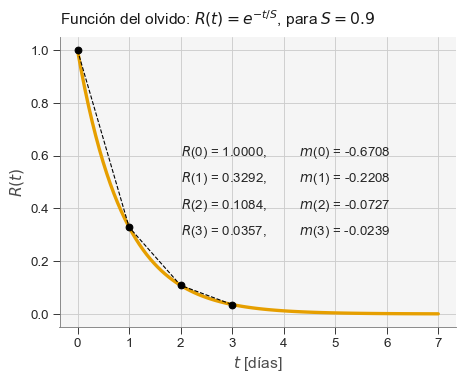

In [6]:
t1 = 1
t2 = 2

# Calculamos la pendiente
pendiente_m = (R(t2) - R(t1) ) / (t2-t1)

# Dominio de tiempo (hasta 7 días).
t = np.linspace(0,7,100)

# La curva del olvido para S = 0.9
plt.plot(t, R(t), lw=3, c='C1')

# Línea punteada
plt.plot([0,1,2,3], [R(0), R(1), R(2), R(3)], 'o--', lw=1, zorder=5)

# Configuración de la gráfica. 
plt.title("Función del olvido: $R(t)=e^{-t/S}$, para $S = 0.9$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")
# Información de los primeros 3 días
plt.text(2,0.6,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(0), m[0], 0))
plt.text(2,0.5,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(1), m[1], 1))
plt.text(2,0.4,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(2), m[2], 2))
plt.text(2,0.3,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(3), m[3], 3))
plt.show()

En la gráfica anterior, la línea punteada nos muestra gráficamente el cambio en la pendiente de la recta que une los puntos negros, los cualea indican los días. Lo que estamos observando es la razón de cambio de $R(t)$ en intervalos de tiempo de longitud $h = 1$. Esto es lo que expresa la fórmula $(2)$. 

¿Será posible calcular **la razón de cambio instantáneo**?, (es decir para $h \to 0$). 

Para ello, esta razón debería calcularse en un solo instante de tiempo, lo cual implica que $t_1 = t_2 \Longrightarrow h = 0$, y esto nos lleva a que la fórmula de $m(t)$ no está bien definida (¡división por cero!). 

Pero, ¿qué pasa si $h$ se hace muy pequeña? es decir:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h} \tag{3}
$$

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. ¿Qué pasa cuando $h \to 0$ para diferentes valores de $S$?.</font>**

<font color="DarkBlue">Ejecuta la siguiente celda de código para generar el interactivo en donde podrás modificar $S$, $h$ y $t$. Explora qué sucede para cada valor de los parámetros y posteriomente responde las preguntas del </font> [Quiz 1](#quiz-1).

<font color="DarkBlue"> Para ver los valores de $R(t)$, $R^\prime(t)$ y $m(t)$ haz clic sobre el botón `Muestra valores` </font>

In [7]:
%run zinteractivo1.ipynb

interactive(children=(FloatSlider(value=0.9, description='S', max=0.9, min=0.3, step=0.2), FloatSlider(value=1…

<function __main__.razonDeCambio(S, h, i0, anot)>

In [ ]:
error = lambda e, a, p: round(abs(round(a,p) - round(e,p)), p)

In [ ]:
print("{:5.4f}".format(error(-0.36576999, -0.22082496, 4),4))

In [ ]:
np.save('sol01.npy',np.array(['0.1450', '.145', '0.145']))

In [ ]:
np.save('sol02.npy',np.array(['0.0196', '.0196']))

In [ ]:
np.save('sol03.npy',np.array(['C', 'c']))

In [ ]:
print("{:5.4f}".format(error(-0.36576999, -0.34618159, 4),4))

**Comentarios.**

Conforme $h$ se hace más pequeño, observamos que la línea roja se aproxima cada vez mejor a la línea tangente (azul) que pasa por el punto rojo. La línea roja representa una aproximación a la razón de cambio instantánea en el punto rojo.

En la gráfica de la derecha observamos la gráfica de $R^\prime(t)$ (curva azul), un punto verde que representa el valor exacto de $R^\prime(t)$ y un punto negro que es la aproximación para una $h$ dada.

Entonces, la tangente en el punto rojo, no es otra cosa que **la razón de cambio instantánea**. Veremos enseguida que ambas cosas se representan un concepto conocido como *la derivada de la función* en el punto rojo.

---

<a name='quiz-1'></a>
#### Quiz 1
**NOTAS**:  
* Para responder estas preguntas, tienes que mover los parámetros en el interactivo a los valores que correspondan y los cálculos necesarios para obtener la respuesta correcta.
* En tus respuestas no escribas más decimales de los que se solicitan.
* Revisa las reglas de redondeo.

1. <font color="DarkBlue">Cuál es la diferencia entre $R'(1)$ y $m(1)$ redondeada a 4 decimales
para $S = 0.9$, $t = 1.0$ y $h = 1.0$</font>

In [12]:
# ejercicio para h = 1.0
ȩ.responde('1', "||R^\prime(1) - m(1)||_{h=1} = ¿?")

FileNotFoundError: _ans.parquet

2. <font color="DarkBlue">Cuál es la diferencia entre $R'(1)$ y $m(1)$ redondeada a 4 decimales
para $S = 0.9$, $t = 1.0$ y $h = 0.1$</font>

In [5]:
# ejercicio para h = 1.0
ȩ1.ejercicio("||R^\prime(1) - m(1)||_{h=0.1} = ¿?",2)

<IPython.core.display.Latex object>

= .196


--------------------------------------------------------------------------------
Cuidado: ocurrió un error en tus cálculos y/o tu respuesta.
--------------------------------------------------------------------------------


3. <font color="DarkBlue">¿Qué sucede con la diferencia entre $R^\prime(t)$ y $m(t)$, cuando $h$ se hace más pequeño ($h\to 0$), sin importar el valor de $t$ ni de $S$?</font>  
    1. Se hace más grande.
    2. Se mantiene constante.
    3. Se hace más pequeña.
    4. No es posible determinarlo.

In [6]:
ȩ1.ejercicio(" ",3)

<IPython.core.display.Latex object>

= c


¡Tu resultado es correcto!


<a name='3'></a>
## Definición de derivada

La fórmula $(3)$ no es otra cosa que la definición formal de la derivada de una función. En casi todos los libros de cálculo encontrarás la siguiente notación para la derivada de la función $f(x)$:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} 
$$

La derivada existe siempre y cuando exista este límite. ¿Puedes imaginar cuando este límite no existe? 

Observe que en la definición anterior se está calculando la pendiente de la función $f(x)$ en $x$. ¿Cuándo es que esta pendiente no se puede calcular?

---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Aproximación de la derivada hacia adelante y hacia atrás.</font>**

<font color="DarkBlue">Ejecute la siguiente celda de código. Obtendrás un interactivo en donde podrás modificar $S$, $h$ y $t$.</font>

---

In [ ]:
%run zinteractivo2.ipynb